In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style = 'darkgrid')
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv(r"F:\Krishna\Excel R\Data Scientist\Assignments\KNN\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


We do not need the animal name columns, so we will remove it.

In [4]:
df.drop(columns = ['animal name'], inplace = True)

Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [7]:
df.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

We do not have any missing values.

Datatype Conversion

In [8]:
df.dtypes

hair        int64
feathers    int64
eggs        int64
milk        int64
airborne    int64
aquatic     int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
fins        int64
legs        int64
tail        int64
domestic    int64
catsize     int64
type        int64
dtype: object

All the datatypes are correct.

Duplicates

In [9]:
df.duplicated()

0      False
1      False
2      False
3       True
4      False
       ...  
96     False
97     False
98      True
99      True
100     True
Length: 101, dtype: bool

In [10]:
df.duplicated().sum()

42

We can see we have 42 duplicated rows, let's remove them.

In [11]:
df.shape

(101, 17)

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.shape

(59, 17)

Outlier Detection

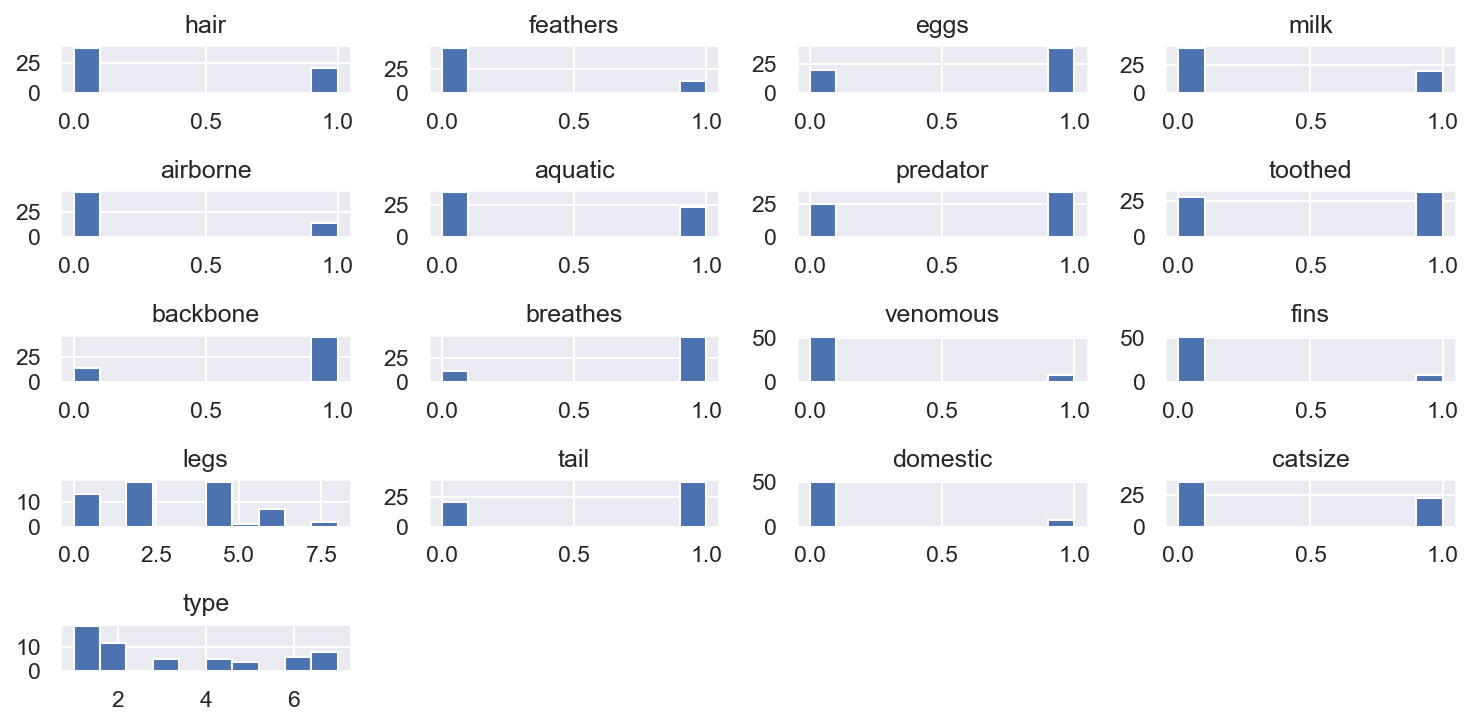

In [14]:
df.hist()
plt.tight_layout()

<Axes: >

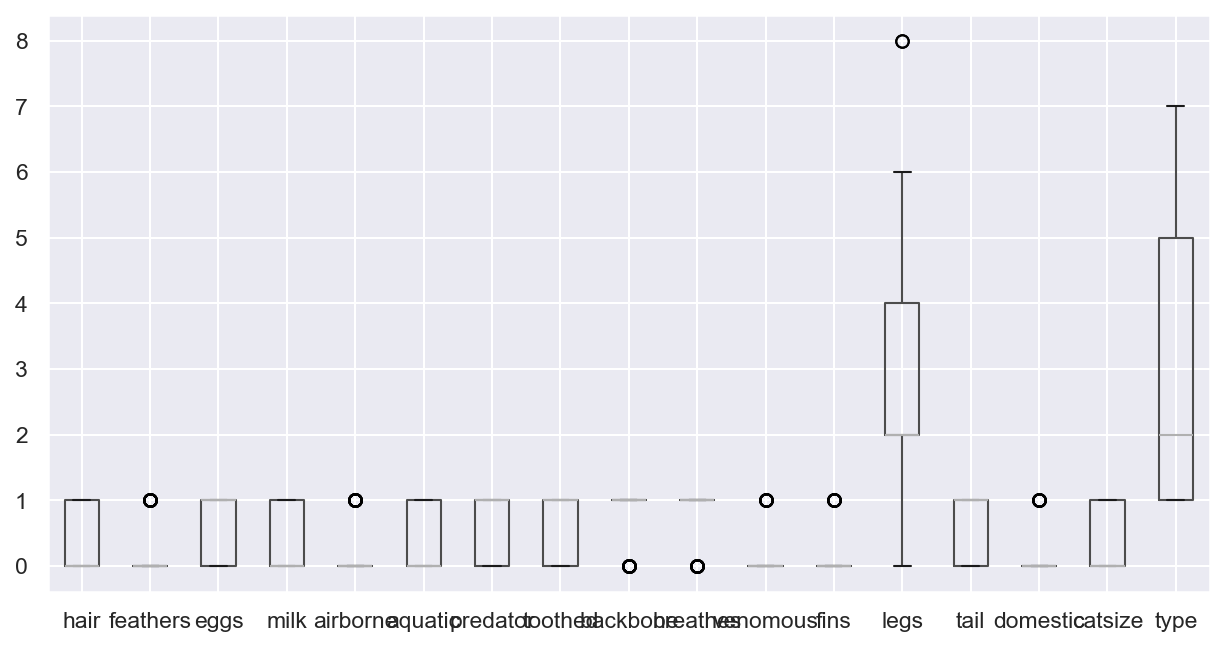

In [15]:
df.boxplot()

In [16]:
def outlier_detection(data, columns):
    
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1
    
        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)
        
        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

In [17]:
df.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type'],
      dtype='object')

In [18]:
outlier_detection(df,df.columns)

<Axes: >

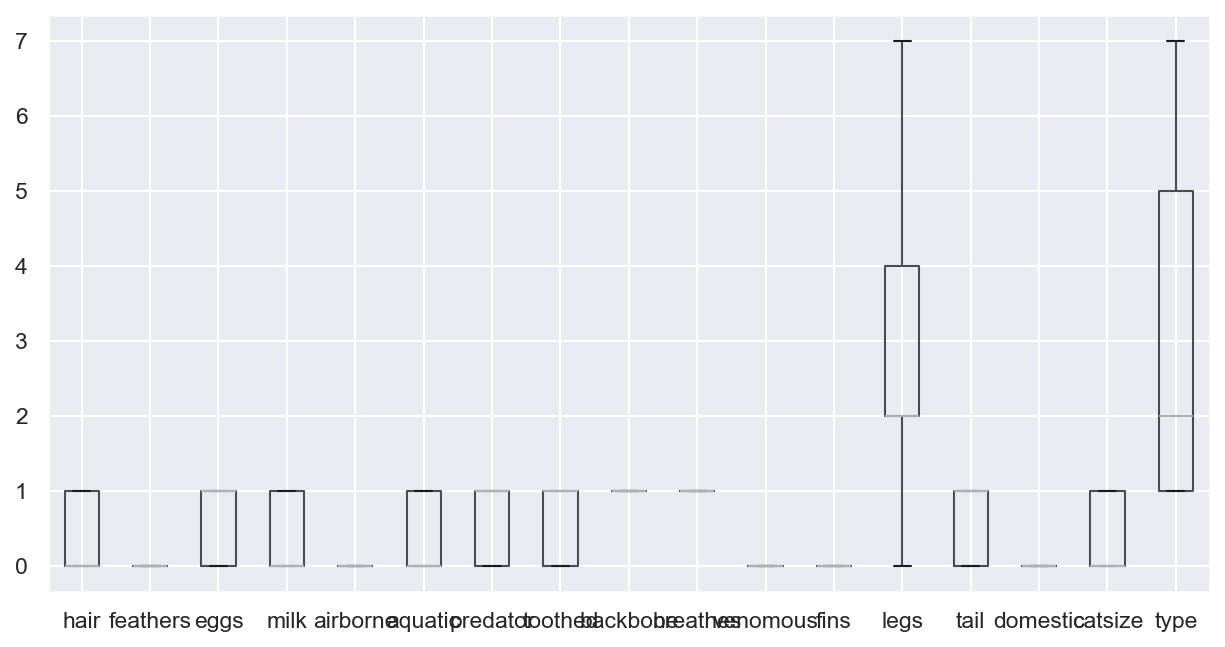

In [19]:
df.boxplot()

Scatter plot and Correlation

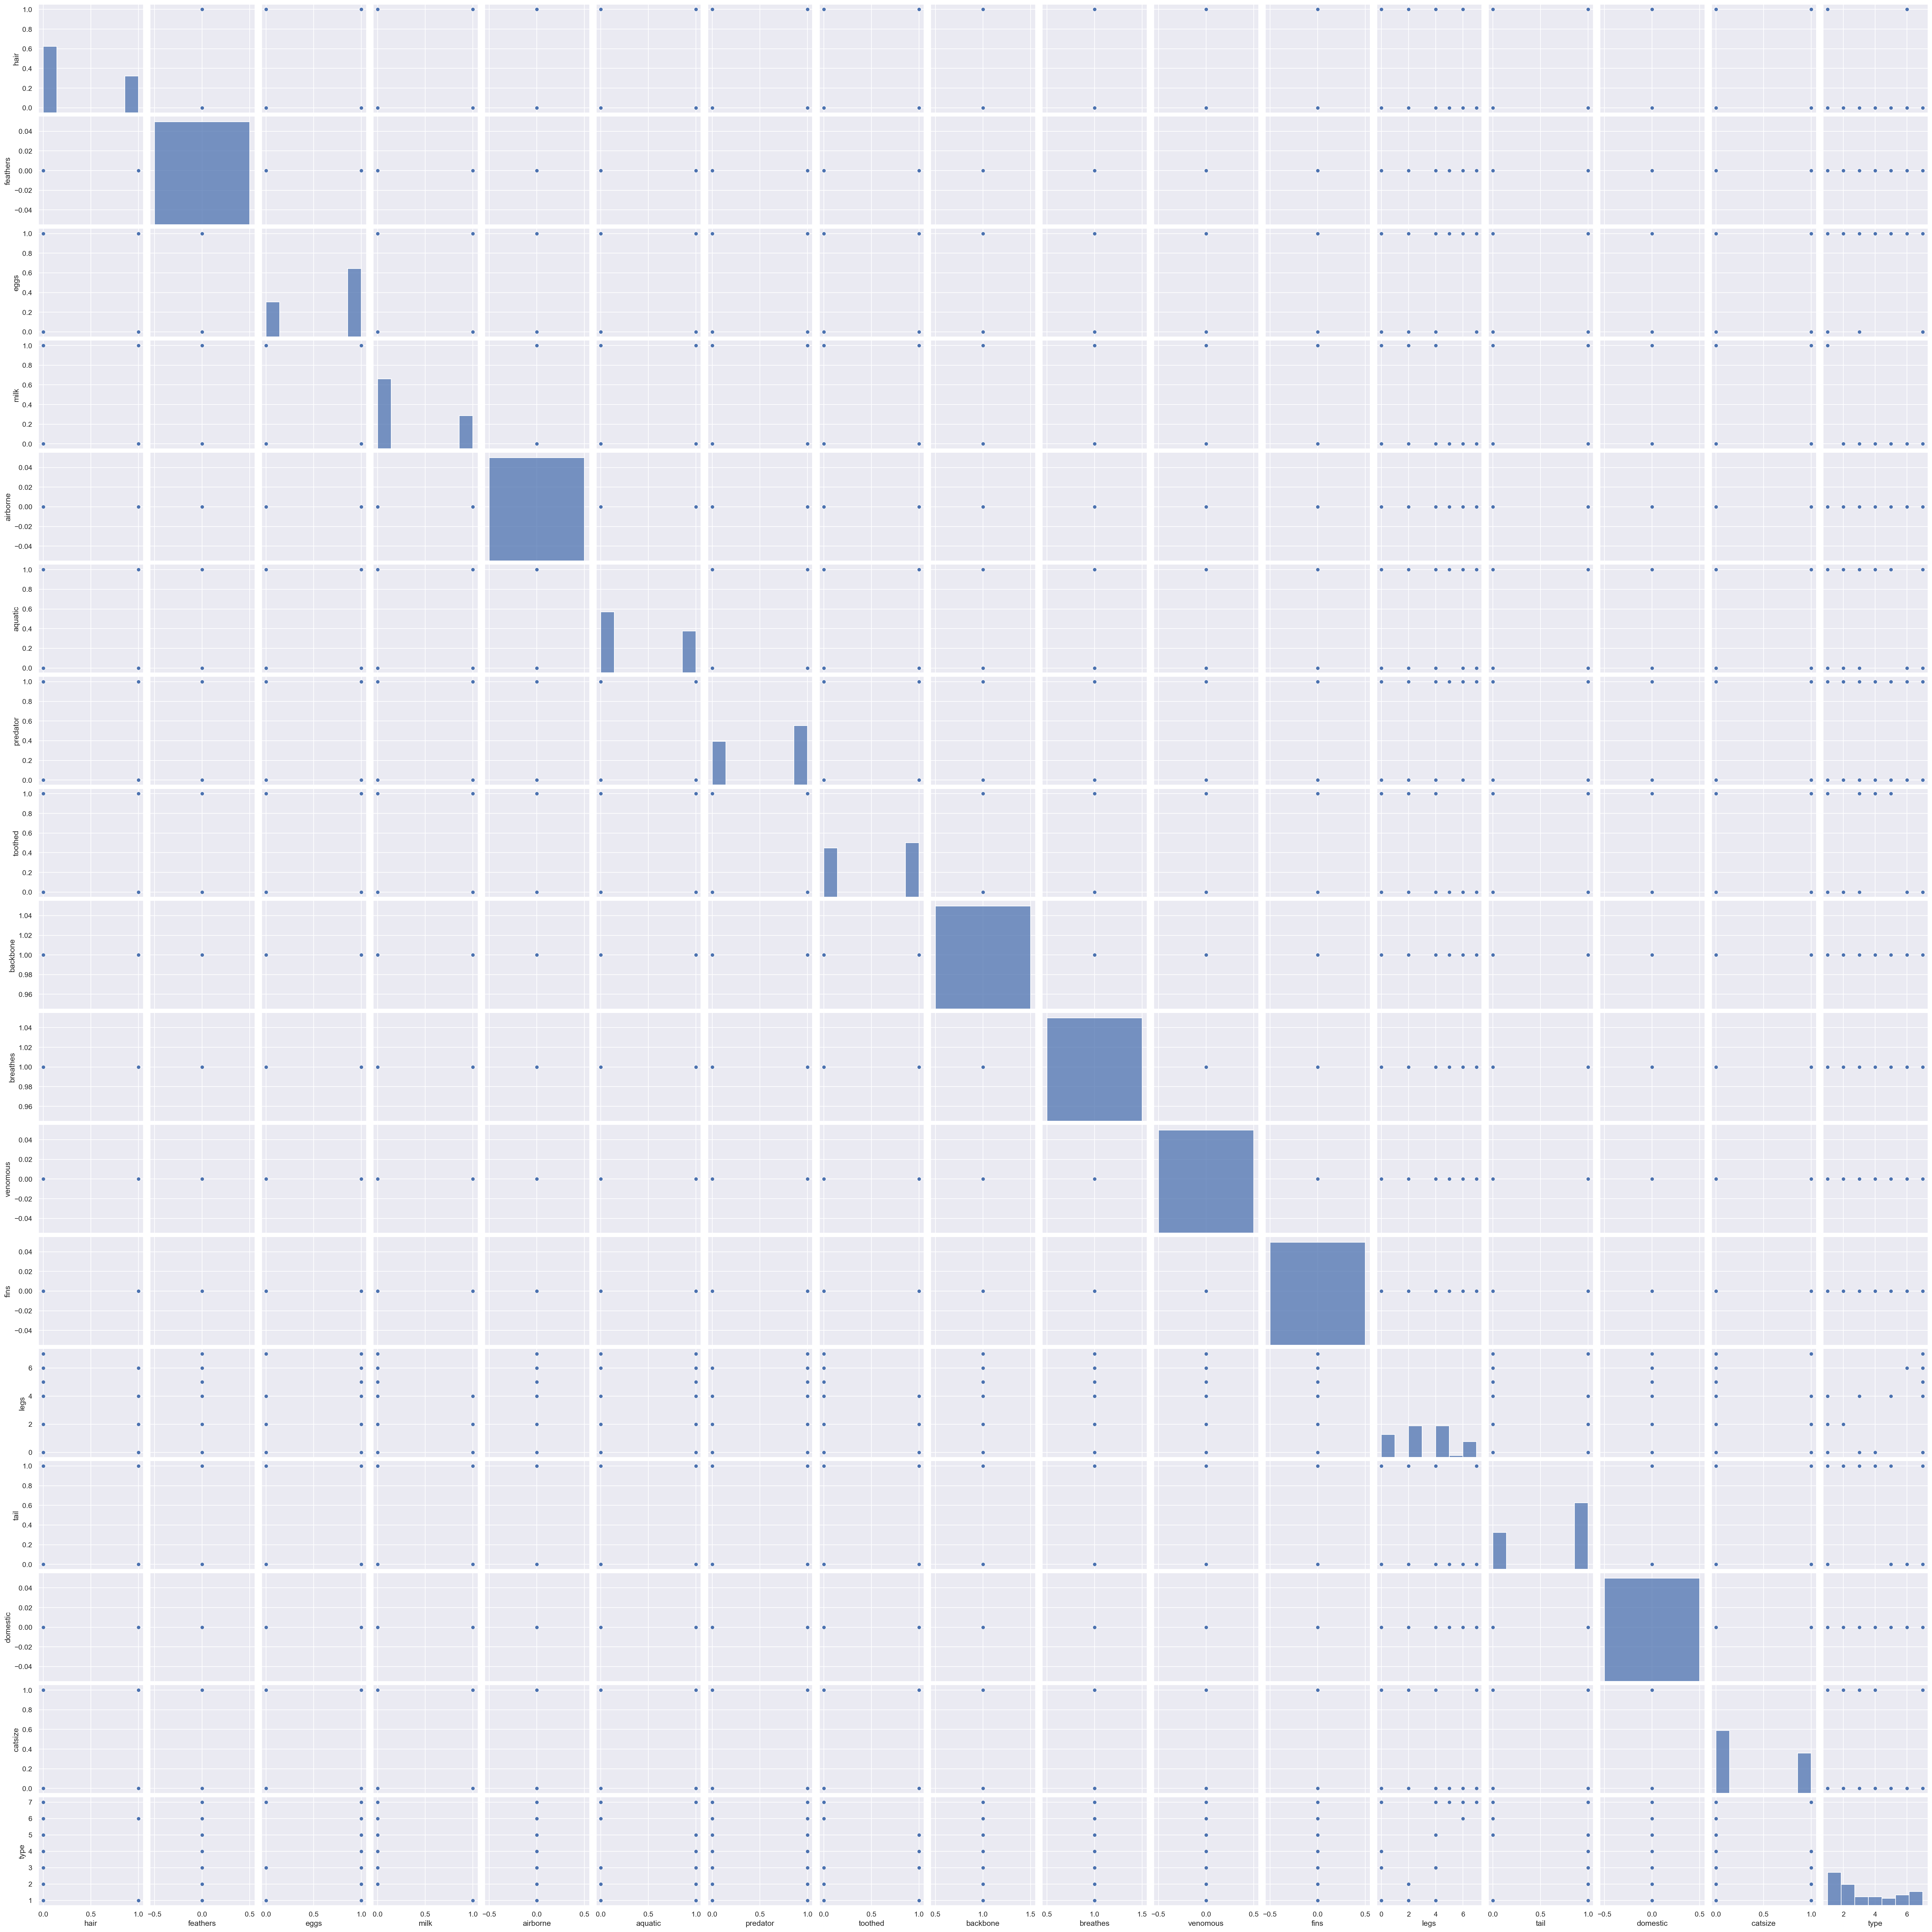

In [20]:
sns.pairplot(df)

From scatterplot, we can't properly visualize this dataset as its multi-dimensional.

In [21]:
df.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,NaN,-0.738958,0.851344,NaN,-0.327336,-0.222198,0.422943,NaN,NaN,NaN,NaN,0.237701,-0.038847,NaN,0.276800,-0.506624
feathers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eggs,-0.738958,NaN,1.000000,-0.885789,NaN,0.228552,0.038072,-0.608878,NaN,NaN,NaN,NaN,-0.029722,-0.158439,NaN,-0.308595,0.589878
milk,0.851344,NaN,-0.885789,1.000000,NaN,-0.201502,-0.069674,0.582364,NaN,NaN,NaN,NaN,0.027726,0.133544,NaN,0.415999,-0.692458
airborne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aquatic,-0.327336,NaN,0.228552,-0.201502,NaN,1.000000,0.360953,0.096032,NaN,NaN,NaN,NaN,-0.213250,-0.032978,NaN,0.045565,0.214084
predator,-0.222198,NaN,0.038072,-0.069674,NaN,0.360953,1.000000,0.078002,NaN,NaN,NaN,NaN,-0.106278,0.007285,NaN,0.122776,0.101018
toothed,0.422943,NaN,-0.608878,0.582364,NaN,0.096032,0.078002,1.000000,NaN,NaN,NaN,NaN,-0.276455,0.215076,NaN,0.133292,-0.458172
backbone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breathes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

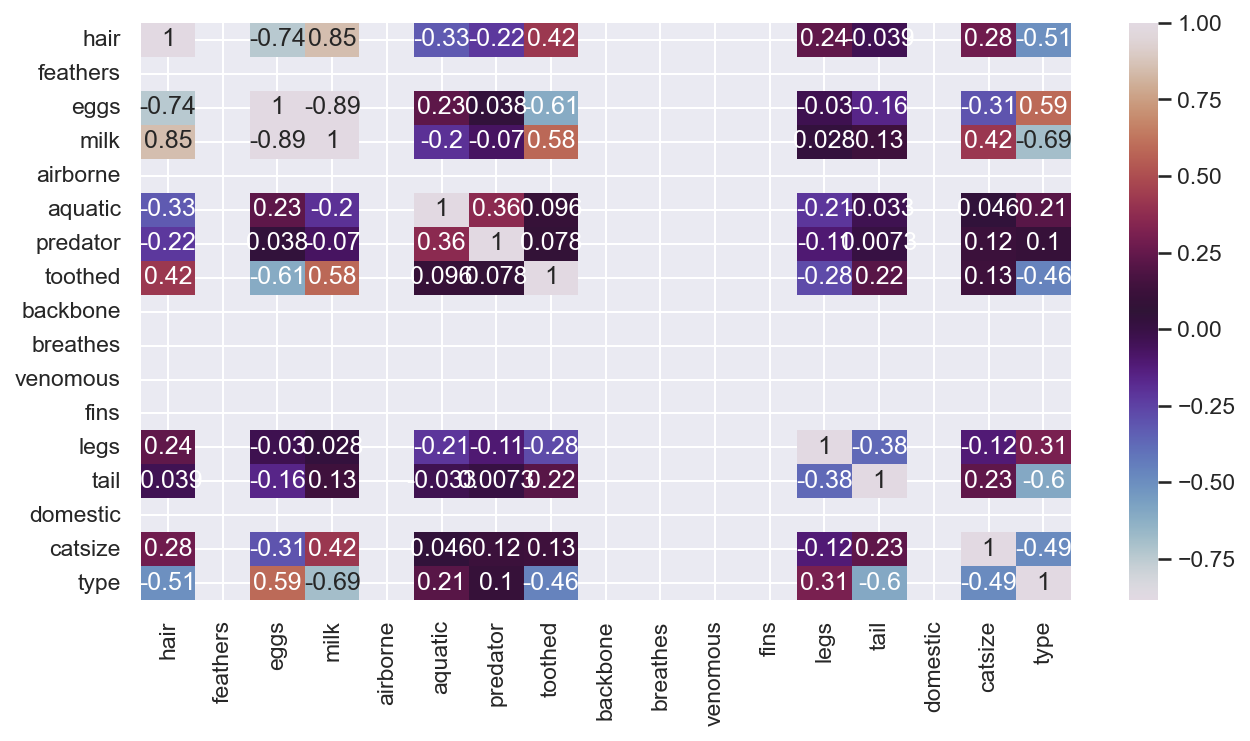

In [23]:
sns.heatmap(df.corr(), annot = True, cmap = 'twilight')

Encoding

All of our colums are data type integer only, so we don't have to do Encoding here.

Scaling

All the columns are mostly consisting minimal int numbers only, so even scaling is not required.

And our data is ready to build the model.

In [24]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0
13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
14,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,7.0


In [27]:
df.shape

(59, 17)

In [28]:
x = df.iloc[:, 0:16]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0
11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
13,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0


In [29]:
y = df['type']
y

0     1.0
1     1.0
2     4.0
4     1.0
6     1.0
7     4.0
9     1.0
11    2.0
13    7.0
14    7.0
15    7.0
16    2.0
18    4.0
19    1.0
21    2.0
23    2.0
24    6.0
25    5.0
26    5.0
27    1.0
29    1.0
30    6.0
32    1.0
33    2.0
34    4.0
35    1.0
36    1.0
39    6.0
40    6.0
41    2.0
42    6.0
43    2.0
48    1.0
49    1.0
52    5.0
53    7.0
56    2.0
58    2.0
62    3.0
63    1.0
68    1.0
71    2.0
72    7.0
74    1.0
75    1.0
76    3.0
77    7.0
80    3.0
81    7.0
84    1.0
85    7.0
86    4.0
87    2.0
89    5.0
90    3.0
91    3.0
95    2.0
96    1.0
97    6.0
Name: type, dtype: float64

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [31]:
xtrain

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
56,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0
68,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
34,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
15,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
86,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
36,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0
91,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0
42,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
71,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0
81,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
ytrain

56    2.0
68    1.0
34    4.0
15    7.0
86    4.0
36    1.0
91    3.0
42    6.0
71    2.0
81    7.0
39    6.0
77    7.0
96    1.0
43    2.0
19    1.0
32    1.0
85    7.0
48    1.0
25    5.0
90    3.0
49    1.0
33    2.0
6     1.0
21    2.0
41    2.0
40    6.0
89    5.0
72    7.0
26    5.0
97    6.0
29    1.0
35    1.0
9     1.0
76    3.0
11    2.0
95    2.0
1     1.0
24    6.0
0     1.0
23    2.0
7     4.0
16    2.0
14    7.0
13    7.0
18    4.0
74    1.0
58    2.0
Name: type, dtype: float64

In [35]:
xtest

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
53,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,7.0,0.0,0.0,1.0
80,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
63,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0
52,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,0.0
62,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
27,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0
30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0
87,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0


In [34]:
ytest

84    1.0
2     4.0
53    7.0
80    3.0
63    1.0
52    5.0
62    3.0
27    1.0
30    6.0
87    2.0
75    1.0
4     1.0
Name: type, dtype: float64

In [36]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.9574468085106383, 0.8333333333333334)

We have got good accuracy score, but still we haven't got a generalized model, bcz we have to give ideal value for n neighbours. So, let's do Hyper parameter tuning for the same.

In [37]:
Train_acc = []
Test_acc = []


for i in range (1,25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    Train_acc.append(knn.score(xtrain, ytrain))
    Test_acc.append(knn.score(xtest, ytest))

In [38]:
Train_acc

[1.0,
 0.9574468085106383,
 0.9574468085106383,
 0.8936170212765957,
 0.9148936170212766,
 0.8297872340425532,
 0.7659574468085106,
 0.7659574468085106,
 0.7446808510638298,
 0.723404255319149,
 0.7021276595744681,
 0.723404255319149,
 0.6808510638297872,
 0.6382978723404256,
 0.6382978723404256,
 0.6382978723404256,
 0.6382978723404256,
 0.6382978723404256,
 0.48936170212765956,
 0.48936170212765956,
 0.48936170212765956,
 0.48936170212765956,
 0.48936170212765956,
 0.48936170212765956]

In [39]:
Test_acc

[0.75,
 0.6666666666666666,
 0.8333333333333334,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.5833333333333334,
 0.3333333333333333,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5]

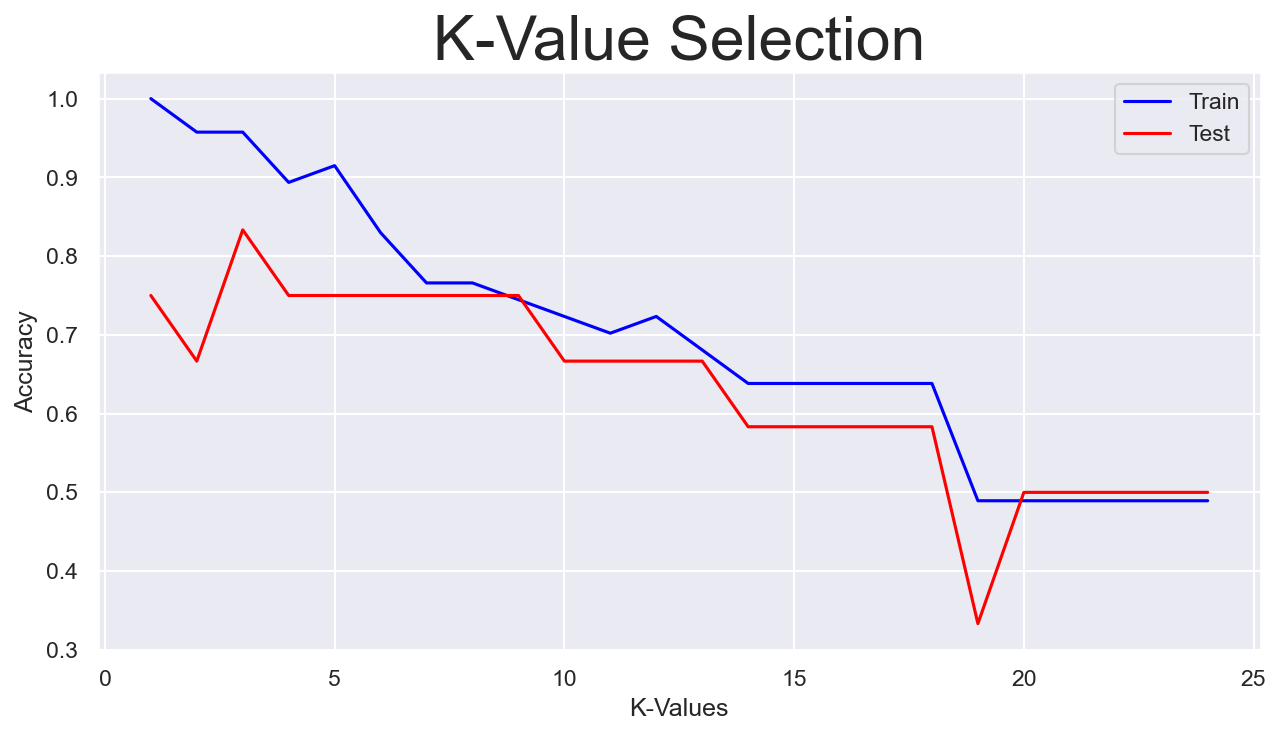

In [41]:
plt.plot(range(1,25), Train_acc, color = 'blue', label = 'Train')   
plt.plot(range(1,25), Test_acc, color = 'red', label = 'Test')  
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('K-Value Selection', size = 30)
plt.legend()     

Will select point where both the accuracies are almost similar, will test it on 6, 7 and 8 (k value will always be whole no)

In [42]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.8297872340425532, 0.75)

In [43]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.7659574468085106, 0.75)

In [44]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain, ytrain), knn.score(xtest, ytest)

(0.7659574468085106, 0.75)

We are having best generalized model for k = 7

In [47]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         5
         2.0       1.00      1.00      1.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.33      1.00      0.50         1
         5.0       1.00      1.00      1.00         1
         6.0       0.50      1.00      0.67         1
         7.0       0.00      0.00      0.00         1

    accuracy                           0.75        12
   macro avg       0.55      0.71      0.60        12
weighted avg       0.65      0.75      0.68        12



G:\Users\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Users\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
G:\Users\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Interview Questions

1. What are the key hyperparameters in KNN?


The only parameters which are required in the training of a KNN algorithm are the value of k and the choice of the distance metric which we would like to choose from our evaluation metric.

2. What distance metrics can be used in KNN?

The K-nearest neighbor (KNN) algorithm uses distance metrics to calculate the distance between a test observation and all training dataset observations. The most appropriate distance metric depends on the dataset, and there is no one-size-fits-all solution. Some common distance metrics used in KNN include: 
1. Euclidean distance
2. Manhattan distance
3. Minkowski distance
4. Cosine similarity
